## Анализ гипотез по увеличению выручки крупного интернет-магазина

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Исходные данные

Работа состоит из двух частей: приоритизация гипотез и анализ А/В теста.

Для превой части понадобиться файл /datasets/hypothesis.csv. Там 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Файл /datasets/hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Для второй части - файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

и файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План работы
#### Загрузка и подготовка данных
Задачи:
- Посмотреть общую информацию о датафреймах.
- Изменение типа данных, если необходимо.
- Проверка на явные дубликаты

#### Приоритизация гипотез
Задачи:
- Примените фреймворк ICE для приоритизации гипотез. Его расчитывают как произведение показателей Impact и Confidence деленное на показатель Efforts. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Его расчитывают как произведение показателей Reach, Impact и Confidence деленное на показатель Efforts. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Анализ A/B-теста
Задачи по результатам A/B-теста:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/2 часть/Принятие решений в бизнесе/Проект/hypothesis.csv')

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/2 часть/Принятие решений в бизнесе/Проект/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('C:/Users/admin/Desktop/ЯндексПрактикум/2 часть/Принятие решений в бизнесе/Проект/visitors.csv')

In [3]:
# проверка общей информации о дф
for i in [hypothesis, orders, visitors]:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 # 

In [4]:
# меняю тип данных в ДФ orders и visitors
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [5]:
# проверка на дубликаты
print('Явных дубликатов в ДФ "hypothesis":', hypothesis.duplicated().sum())
print('Явных дубликатов в ДФ "orders":', orders.duplicated().sum())
print('Явных дубликатов в ДФ "visitors":', visitors.duplicated().sum())

Явных дубликатов в ДФ "hypothesis": 0
Явных дубликатов в ДФ "orders": 0
Явных дубликатов в ДФ "visitors": 0


Выводы:
- поменял тип данных в столбацах с датами;
- явных дубликатов не обнаружено.

## Приоритизация гипотез

In [6]:
hypothesis
pd.options.display.max_colwidth = 150

In [7]:
# применение фреймворка ICE
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


- При использовании фреймворка ICE видно 3х лидеров гипотез: "Запустить акцию, дающую скидку на товар в день рождения"; "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"; "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". У этих гипотез выскокий уровень показателей Impact и Confidence, что говорит об уверенности во влиянии этих нововведений на пользователей. Также средний уровень показателя Efforts показывает, что для проверки данных гипотез потребуется немного ресурсов.   

In [8]:
# применение фреймворка RICE
hypothesis['RICE'] = round(hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


- При использовании фреймворка RICE видно, какое влияние оказывает охват аудитории. Лидер проверки ICE, гипотеза "Запустить акцию, дающую скидку на товар в день рождения", закрывает всего лишь пятерку лучших гипотез по RICE, т.к. данная гипотеза направлена на малую аудиторию (Reach=1). Гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" также в тройке лучших, при этом гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" имеет явное преимущество в приоритизации за счет большого охвата. Также появились гипотезы с высоким RICE: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

Выводы:
- При использовании обоих методов можно выделить постоянных лидеров: гипотеза под индексом 7 и 0.
- Показатели охвата гипотезы важны при приоритизации гипотезы.

## Анализ А/В теста

In [9]:
print(orders.head(5))
print()
print(visitors.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B

        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [10]:
ordersA = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()
ordersB = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

In [11]:
print('Количество групп в тесте:', len(visitors['group'].unique()))
print('Дата начала теста: {}; дата окончания теста: {}'.format(min(visitors.date), max(visitors.date)))
print('В группе А пользователей: {}. B группе В пользователей: {}'.format(len(ordersA), len(ordersB)))

Количество групп в тесте: 2
Дата начала теста: 2019-08-01 00:00:00; дата окончания теста: 2019-08-31 00:00:00
В группе А пользователей: 503. B группе В пользователей: 586


In [12]:
# подготовка данных для построения графиков
# кумулятивное количество посетителей для обоих групп
visitors_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a.columns = ['date', 'visitors_a_per_day']
visitors_a_cummul = (visitors_a.apply(lambda x: visitors_a[visitors_a['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitors_a_per_day': 'sum'}), axis=1))
visitors_a_cummul.columns = ['date', 'visitors_a_cumul']

visitors_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b.columns = ['date', 'visitors_b_per_day']
visitors_b_cummul = (visitors_b.apply(lambda x: visitors_b[visitors_b['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitors_b_per_day': 'sum'}), axis=1))
visitors_b_cummul.columns = ['date', 'visitors_b_cumul']

In [13]:
# кумулятивная сумма покупок и количества транзакций для обоих групп
revenue_a = (orders[orders['group'] == 'A'][['date', 'transactionId', 'revenue']]
             .groupby('date', as_index=False)
             .agg({'transactionId': 'nunique', 'revenue': 'sum'}))
revenue_a.columns = ['date', 'transaction_a_per_day', 'revenue_a_per_day']
revenue_a_cumul = (revenue_a.apply(lambda x: revenue_a[revenue_a['date'] <= x['date']]
                                   .agg({'date': 'max','transaction_a_per_day': 'sum', 'revenue_a_per_day': 'sum'}), axis=1))
revenue_a_cumul.columns = ['date', 'transaction_a_cumul', 'revenue_a_cumul']

revenue_b = (orders[orders['group'] == 'B'][['date', 'transactionId', 'revenue']]
             .groupby('date', as_index=False)
             .agg({'transactionId': 'nunique', 'revenue': 'sum'}))
revenue_b.columns = ['date', 'transaction_b_per_day', 'revenue_b_per_day']
revenue_b_cumul = (revenue_b.apply(lambda x: revenue_b[revenue_b['date'] <= x['date']]
                                   .agg({'date': 'max','transaction_b_per_day': 'sum', 'revenue_b_per_day': 'sum'}), axis=1))
revenue_b_cumul.columns = ['date', 'transaction_b_cumul', 'revenue_b_cumul']

In [14]:
# объединяю полученные таблицы
data = (revenue_a.merge(revenue_b, on='date')
        .merge(revenue_a_cumul, on='date')
        .merge(revenue_b_cumul, on='date')
        .merge(visitors_a, on='date')
        .merge(visitors_b, on='date')
        .merge(visitors_a_cummul, on='date')
        .merge(visitors_b_cummul, on='date'))

In [15]:
data.head(5)

,date,transaction_a_per_day,revenue_a_per_day,transaction_b_per_day,revenue_b_per_day,transaction_a_cumul,revenue_a_cumul,transaction_b_cumul,revenue_b_cumul,visitors_a_per_day,visitors_b_per_day,visitors_a_cumul,visitors_b_cumul
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [16]:
print('Количество пользователей, попавших в обе группы:', len(ordersA) - len(ordersA[np.logical_not(ordersA.isin(ordersB))]))

Количество пользователей, попавших в обе группы: 58


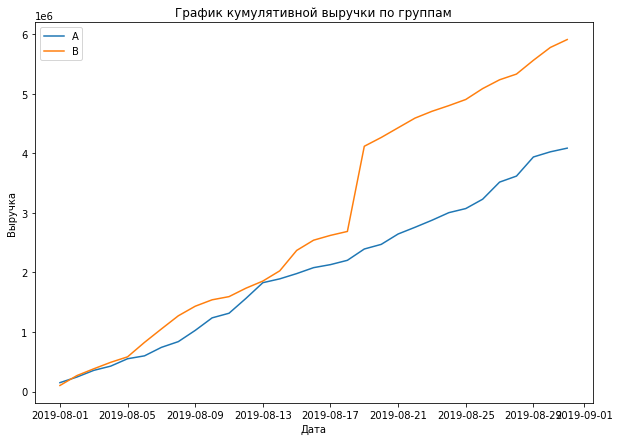

In [17]:
# график кумулятивной выручки по группам
plt.figure(figsize=(10,7))
plt.plot(data['date'], data['revenue_a_cumul'], label='A')
plt.plot(data['date'], data['revenue_b_cumul'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.show()

- по графику можно заметить, что равномерный рост выручки был на протяжении всего времени. Также виден некий скачок группы В в середине месяца. Возможно, было большое количество заказов, либо дорогая покупка.

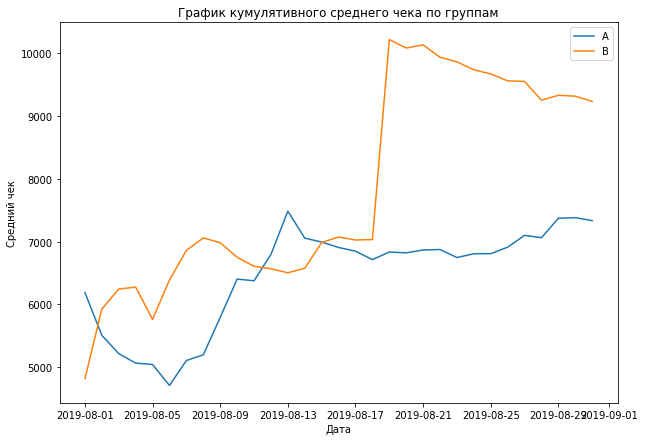

In [18]:
# график кумулятивного среднего чека по группам
plt.figure(figsize=(10,7))
plt.plot(data['date'], data['revenue_a_cumul']/data['transaction_a_cumul'], label='A')
plt.plot(data['date'], data['revenue_b_cumul']/data['transaction_b_cumul'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

- да, видимо в группе В была дорогая покупка. Средний чек группы B рос до крупной покупки, а после нее наблюдается спад.
По группе А можно отметить, что к концу месяца средний чек усредняется.

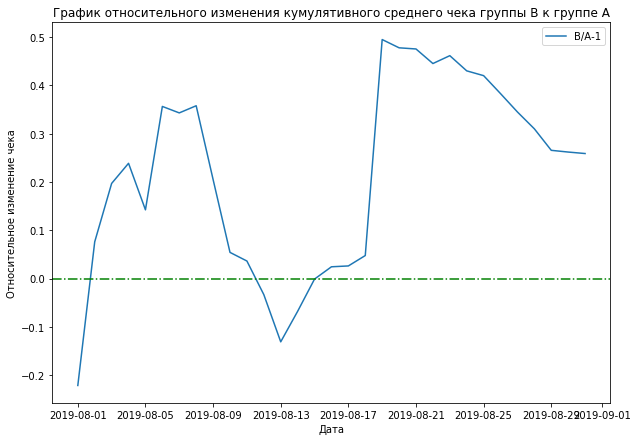

In [19]:
# график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(10,7))
plt.plot(data['date'], ((data['revenue_b_cumul']/data['transaction_b_cumul'])
                        /(data['revenue_a_cumul']/data['transaction_a_cumul'])-1), label='B/А-1')
plt.axhline(y=0, color='green', linestyle='-.') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение чека')
plt.legend()
plt.show()

- график сильно скачет из-за каких-то аномалий или дорогих покупок. Также заметен стремительное падение среднего чека группы В по отношению к группе А, но под конец видная некая стабильность. Нужно глянуть на выбросы значений. 

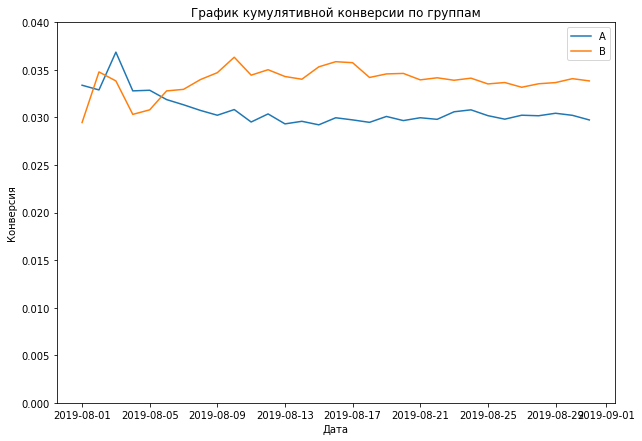

In [20]:
# график кумулятивной конверсии по группам
plt.figure(figsize=(10,7))
plt.plot(data['date'], data['transaction_a_cumul']/data['visitors_a_cumul'], label='A')
plt.plot(data['date'], data['transaction_b_cumul']/data['visitors_b_cumul'], label='B')
plt.ylim([0, 0.04]) 
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

- на протяжении большого времени графики зафиксировались в одном значении. В начале видно, группа А имела большую конверсию, но через некоторое время конверсия группы В вырвалась вперед и усреднилась. Также следует отметить, что под конец месяца конверсия группы А падала, а группы В - постоянна. 

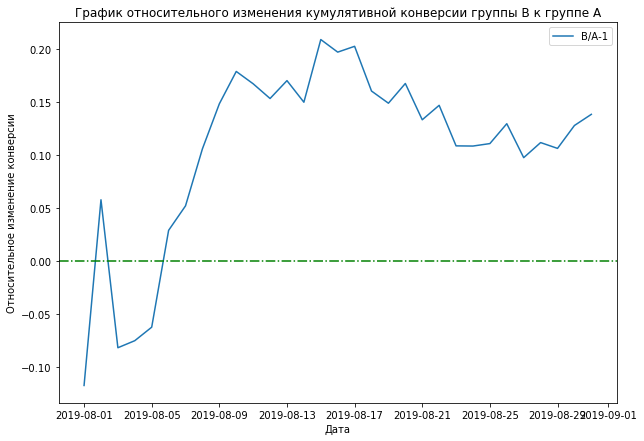

In [21]:
# график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(10,7))
plt.plot(data['date'], ((data['transaction_b_cumul']/data['visitors_b_cumul'])
                        /(data['transaction_a_cumul']/data['visitors_a_cumul'])-1), label='B/А-1')
plt.axhline(y=0, color='green', linestyle='-.') 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')
plt.legend()
plt.show()

- по графику видно существенное различие между группами. Также следует отметить некий рост разницы конверсии под конец месяца связанный с уменьшением конверсии группы А.

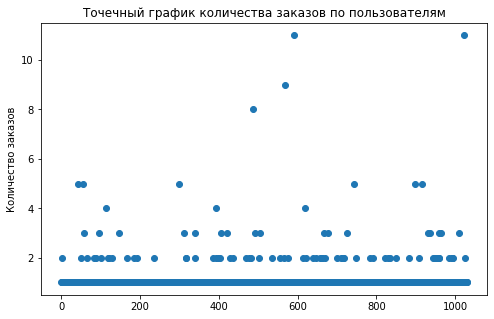

In [22]:
# считаю количество уникальных заказов пользователей
orders_by_users = (orders
                   .groupby('visitorId', as_index=False)
                   .agg({'transactionId': 'nunique'}))
orders_by_users.columns = ['visitorId', 'orders']

# точечный график количества заказов по пользователям
x_values = pd.Series(range(0, len(orders_by_users['orders'])))
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

- видны пользователи с большим количеством заказов . Есть пользователи с 11 заказами. С выбросами нам поможет расчет перцентиля.

In [23]:
# расчет 95-го и 99-го перцентиля количества заказов на пользователя
print('95-ый перцентиль количества заказов равен:', np.percentile(orders_by_users['orders'], 95))
print('99-ый перцентиль количества заказов равен:', np.percentile(orders_by_users['orders'], 99))

95-ый перцентиль количества заказов равен: 2.0
99-ый перцентиль количества заказов равен: 4.0


- не более 5% пользователей делали заказ больше 2 раз; не более 1% - больше 4 раз. Верхняя граница числа заказов пользователей будет 2 заказа.

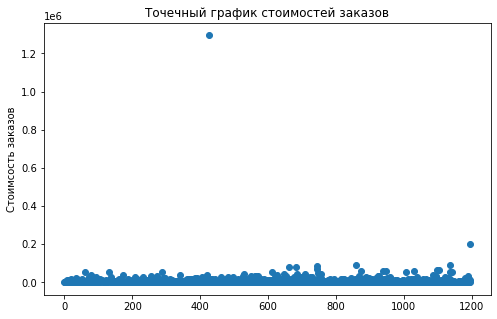

In [24]:
# точечный график стоимостей заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимсость заказов')
plt.show()

- есть заказы на суммы больше чем в 1 миллион. С выбросами поможет расчет перцентиля. 

In [25]:
# расчет 95-го и 99-го перцентиля стоимости заказов
print('95-ый перцентиль стоимости заказов равен:', round(np.percentile(orders['revenue'], 95),3))
print('99-ый перцентиль стоимости заказов равен:', round(np.percentile(orders['revenue'], 99),3))

95-ый перцентиль стоимости заказов равен: 28000.0
99-ый перцентиль стоимости заказов равен: 58233.2


- не более 5% заказов на сумму больше 28 тысяч; не более 1% заказов на сумму более 58 тысяч. Верхнюю границу установим в 28 тысяч.

In [26]:
# группировка пользователей по группам и расчет количества уникальных заказов
orders_a_by_users = (orders[orders['group'] == 'A']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': 'nunique'}))
orders_a_by_users.columns = ['visitorId', 'orders']

orders_b_by_users = (orders[orders['group'] == 'B']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': 'nunique'}))
orders_b_by_users.columns = ['visitorId', 'orders']

**Проводим расчет статистической значимости. Нулевая гипотеза: различий в среднем числе заказов между группами по "сырым" данным нет. Альтернативная гипотеза: различия в среднем числе заказов между группами по "сырым" данным есть.**

In [27]:
# расчет статистической значимости различий в среднем числе заказов между группами по «сырым» данным
sample_a = pd.concat([orders_a_by_users['orders'],pd.Series(0, index=np.arange(data['visitors_a_per_day'].sum() - 
                                                                           len(orders_a_by_users['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_b_by_users['orders'],pd.Series(0, index=np.arange(data['visitors_b_per_day'].sum() - 
                                                                           len(orders_b_by_users['orders'])), name='orders')],axis=0)

print("p-value равен: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("Различие между группами: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value равен: 0.017
Различие между группами: 0.138


- Нулевую гипотезу, которая гласит, что статистически значимых различий в среднем числе заказов нет, не отвергаем, т.к. p-value > 0.05
- Относительное различие между группами составляет 13.8% (группа В больше)

**Нулевая гипотеза: различий в среднем чеке заказов между группами по "сырым" данным нет. Альтернативная гипотеза: различия в среднем чеке заказов между группами по "сырым" данным есть.**

In [28]:
# расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
print("p-value равен {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                                      orders[orders['group'] == 'B']['revenue'])[1]))
print("Различие между группами: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равен 0.729
Различие между группами: 0.259


- Нулевую гипотезу, которая гласит, что статистически значимых различий в среднем чеке нет, не отвергаем, т.к. p-value > 0.05
- Относительное различие между группами составляет 25.9% (группа В больше). Надо посмотреть результаты без аномалий. 

In [29]:
# выделение аномальных пользователей
users_many_orders = pd.concat([orders_a_by_users[orders_a_by_users['orders']>2]['visitorId'],
                              orders_b_by_users[orders_b_by_users['orders']>2]['visitorId']])
anomal_users = pd.concat([users_many_orders, orders[orders['revenue']>28000]['revenue']], axis=0).drop_duplicates()
print('Количество аномальных пользователей:', len(pd.concat([users_many_orders, orders[orders['revenue']>28000]['revenue']
                                                        ], axis=0).drop_duplicates()))

Количество аномальных пользователей: 69


**Нулевая гипотеза: различий в среднем числе заказов между группами по "очищенным" данным нет. Альтернативная гипотеза: различия в среднем числе заказов между группами по "очищенным" данным есть.**

In [30]:
# расчет статистической значимости различий в среднем числе заказов между группами по «очищенным» данным 
filtered_sample_a = pd.concat([orders_a_by_users[np.logical_not(orders_a_by_users['visitorId'].isin(anomal_users))]['orders']
                               ,pd.Series(0, index=np.arange(data['visitors_a_per_day'].sum()
                                                             - len(orders_a_by_users['orders'])), name='orders')],axis=0)

filtered_sample_b = pd.concat([orders_b_by_users[np.logical_not(orders_b_by_users['visitorId'].isin(anomal_users))]['orders']
                               ,pd.Series(0, index=np.arange(data['visitors_b_per_day'].sum()
                                                             - len(orders_b_by_users['orders'])), name='orders')],axis=0)

print("p-value без аномалий равен: {0:.3f}".format(stats.mannwhitneyu(filtered_sample_a, filtered_sample_b)[1]))
print("Различие между группами без аномалий: {0:.3f}".format(filtered_sample_b.mean() / filtered_sample_a.mean() - 1))

p-value без аномалий равен: 0.012
Различие между группами без аномалий: 0.170


- Нулевую гипотезу не отвергаем
- p-value практически не изменилось, а разница в среднем числе заказов увеличилась на 3.2% 

**Нулевая гипотеза: различий в среднем чеке заказов между группами по "очищенным" данным нет. Альтернативная гипотеза: различия в среднем чеке заказов между группами по "очищенным" данным есть.**

In [31]:
# расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
print("p-value без аномалий равен {0:.3f}".format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitorId'].isin(anomal_users)))]['revenue'],
orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(anomal_users)))]['revenue'])[1]))

print("Различие между группами без аномалий: {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', 
                                                np.logical_not(orders['visitorId'].isin(anomal_users)))]['revenue'].mean() 
                                                / orders[np.logical_and(orders['group'] == 'A', 
                                                np.logical_not(orders['visitorId'].isin(anomal_users)))]['revenue'].mean() - 1))

p-value без аномалий равен 0.661
Различие между группами без аномалий: 0.234


- Нулевую гипотезу не отвергаем
- p-value упало на 6.8%, разница между группами упала на 2.5%

## Выводы
- Статистически значимых различий в среднем числе заказов по "сырым" и "очищенныи" данным нет, p-value во обоих случаях больше 0.05.
- Статистически значимых различий в среднем чеке по "сырым" и "очищенным" данным нет, p-value во обоих случаях больше 0.05.
- Расчеты относительного различия по среднему числу заказов и среднему чеку между группами показали, что группа В лучше группы А. Также можно сказать и по очищенным данным, различие не существенно изменилось на 2.5 и 3.2% по сравнению с "сырыми" данными.
- График различия по среднему чеку показывает различий в среднем на 20%, но график падает и стабильность не наблюдается.
- График различия по конверсии растет, но стабильность значений также не наблюдается

**Исходя из этого можно сказать, группа В показала хорошие результаты по сравнению с группой А, об этом говорят графики и расчёты. Но стабильности значений между группами не наблюдается.** 

**Мои рекомендации сводятся к продолжении теста до получения стабильных метрик, чтобы можно было полноценно оценить А/В тест.**